<a href="https://colab.research.google.com/github/FedericoVaona99/Cover-Time-of-Simple-Random-Walks-on-a-Graph/blob/main/Project1_Probabilty_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVER TIME OF SIMPLE RANDOM WALKS ON A GRAPH**

Code to Simulate a Simple Random Walk Semplice on a complete graph with a determined number of steps

In [ ]:
import networkx as nx
import random
import numpy as np

# save the path of a random walk
def random_walk_simple(graph, start_node, num_steps):
    current_node = start_node
    path = [current_node]

    for _ in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        next_node = random.choice(neighbors)
        path.append(next_node)
        current_node = next_node

    return path

def main():
    n = 5  # Number of nodes
    complete_graph = nx.complete_graph(n)

    start_node = random.choice(list(complete_graph.nodes))
    num_steps = 10

    path = random_walk_simple(complete_graph, start_node, num_steps)

    print(f"Random walk path: {path}")

if __name__ == "__main__":
    main()


Random walk path: [3, 4, 2, 0, 1, 3, 1, 2, 3, 2, 0]


**FIT of datas with MSE** with N = 50*beta and M = 10

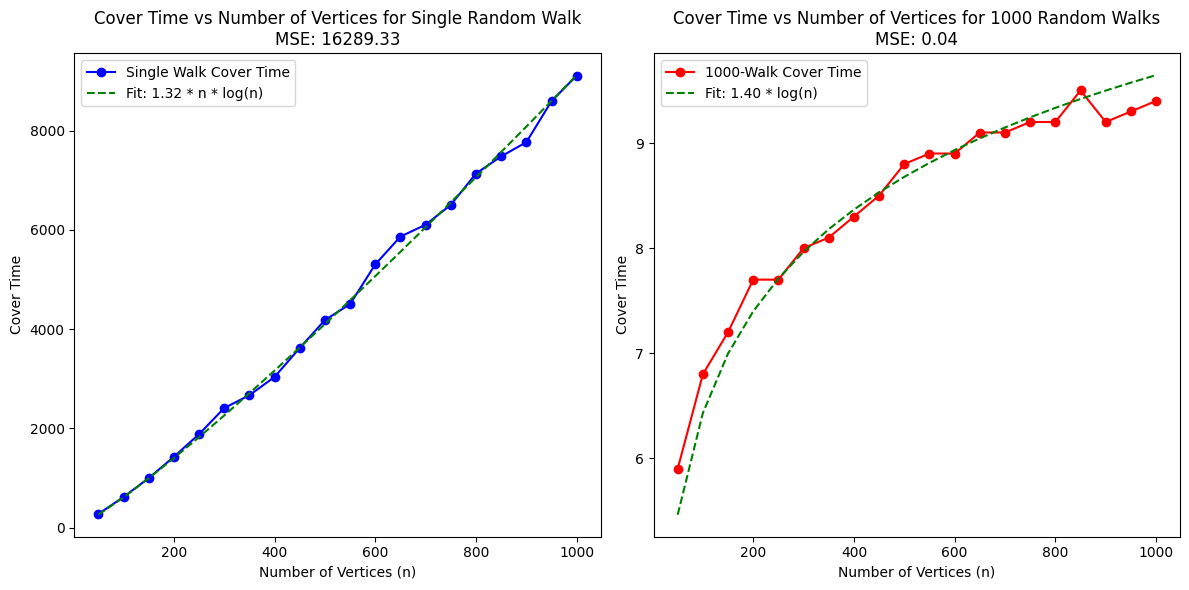

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Return the average cover time over all simulations
def cover_time_single_walk(graph, start_node, num_simulations):

    cover_times = [] # Record the cover times of all the simulations
    num_nodes = graph.number_of_nodes()

    # Perform a specified number of random walk simulations
    for _ in range(num_simulations):
        visited = set()  # Set of visited nodes
        current_node = start_node  # Starting node for the walk
        steps = 0  # Step counter

        # Simulate the walk until all nodes have been visited
        while len(visited) < num_nodes:
            visited.add(current_node)  # Add the current node to the set of visited nodes  (visited is a set, so it doesn't add nodes already visited(duplicated))
            neighbors = list(graph.neighbors(current_node))  # Get the neighbors of the current node
            current_node = random.choice(neighbors)  # Choose a random neighbor as the next node
            steps += 1  # Increment the step counter

        cover_times.append(steps)  # Record the number of steps taken to cover all nodes

    return np.mean(cover_times)  # Return the average cover time over all simulations

def cover_time_multiple_walks(graph, start_node, num_simulations, num_walks):
    cover_times = [] # Record the cover times of all the simulation
    num_nodes = graph.number_of_nodes()

    # Perform a specified number of simulations of parallel random walks
    for _ in range(num_simulations):
        visited = set()  # Set of visited nodes
        current_nodes = [start_node] * num_walks  # Starting nodes for each parallel walk
        steps = 0  # Step counter

        # Simulate the parallel walks until all nodes have been visited
        while len(visited) < num_nodes:
          # for every parallel walk
            for i in range(num_walks):
                neighbors = list(graph.neighbors(current_nodes[i]))  # Get the neighbors of the current node
                current_nodes[i] = random.choice(neighbors)  # Choose a random neighbor as the next node
                visited.add(current_nodes[i])  # Add the new current node to the set of visited nodes
            steps += 1  # Increment the step counter

        cover_times.append(steps)  # Record the number of steps taken to cover all nodes

    return np.mean(cover_times)  # Return the average cover time over all simulations

# Fit function for cover time of a single random walk
def single_walk_fit(n, c):
    return c * n * np.log(n)

# Fit function for cover time of k parallel random walks
def multiple_walk_fit(n, c):
    return c * np.log(n)
#---------------------------------------------------------------------------------------------------------------------------------------------
# Main function
def main():
    num_simulations = 10  # number of simulations
    beta_values = range(1, 21)  # β ∈ {1, 2, ..., 20}
    n_values = [50 * beta for beta in beta_values]  # Values of n: 50, 100, ..., 1000

    single_walk_cover_times = []  # List for cover times of single random walks
    multiple_walk_cover_times = []  # List for cover times of parallel random walks

    # Iterate over different values of n
    for n in n_values:
        complete_graph = nx.complete_graph(n)  # Create a complete graph with n nodes
        cover_times_single = []  # List for cover times of single random walks

        # Compute cover time for a SINGLE RANDOM WALK FOR EACH NODE in the graph
        for start_node in complete_graph.nodes:
            cover_time_single = cover_time_single_walk(complete_graph, start_node, num_simulations)
            cover_times_single.append(cover_time_single)

        # Find the MAX cover time among all nodes for the single random walk
        max_cover_time_single = max(cover_times_single)
        single_walk_cover_times.append(max_cover_time_single)

        k = n  # Number of parallel walks (equal to the number of nodes)
        cover_times_multiple = []  # List for cover times of parallel random walks

        # Compute cover time for K PARALLEL random walks FOR EACH NODE in the graph
        for start_node in complete_graph.nodes:
            cover_time_multi = cover_time_multiple_walks(complete_graph, start_node, num_simulations, k)
            cover_times_multiple.append(cover_time_multi)

        # Find the MAX cover time among all nodes for the parallel walks
        max_cover_time_multiple = max(cover_times_multiple)
        multiple_walk_cover_times.append(max_cover_time_multiple)

    # Fit data using curve_fit for single random walk
    popt_single, _ = curve_fit(single_walk_fit, n_values, single_walk_cover_times)
    # Fit data using curve_fit for parallel random walks
    popt_multiple, _ = curve_fit(multiple_walk_fit, n_values, multiple_walk_cover_times)

    # Extract constants c from fits
    c_single = popt_single[0]
    c_multiple = popt_multiple[0]

    # Compute predicted values and MSE for the single random walk
    y_fit_single = single_walk_fit(np.array(n_values), c_single)
    mse_single = np.mean((np.array(single_walk_cover_times) - y_fit_single) ** 2)

    # Compute predicted values and MSE for the parallel random walks
    y_fit_multiple = multiple_walk_fit(np.array(n_values), c_multiple)
    mse_multiple = np.mean((np.array(multiple_walk_cover_times) - y_fit_multiple) ** 2)

    # Plot results
    plt.figure(figsize=(12, 6))

    # Plot for cover time of single random walk
    plt.subplot(1, 2, 1)
    plt.plot(n_values, single_walk_cover_times, marker='o', linestyle='-', color='b', label='Single Walk Cover Time')
    plt.plot(n_values, y_fit_single, linestyle='--', color='g', label=f'Fit: {c_single:.2f} * n * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for Single Random Walk\nMSE: {mse_single:.2f}')
    plt.legend()

    # Plot for cover time of k parallel random walks
    plt.subplot(1, 2, 2)
    plt.plot(n_values, multiple_walk_cover_times, marker='o', linestyle='-', color='r', label=f'{k}-Walk Cover Time')
    plt.plot(n_values, y_fit_multiple, linestyle='--', color='g', label=f'Fit: {c_multiple:.2f} * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for Multiple Random Walks\nMSE: {mse_multiple:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


SAME AS CODE ABOVE BUT WITH M=20

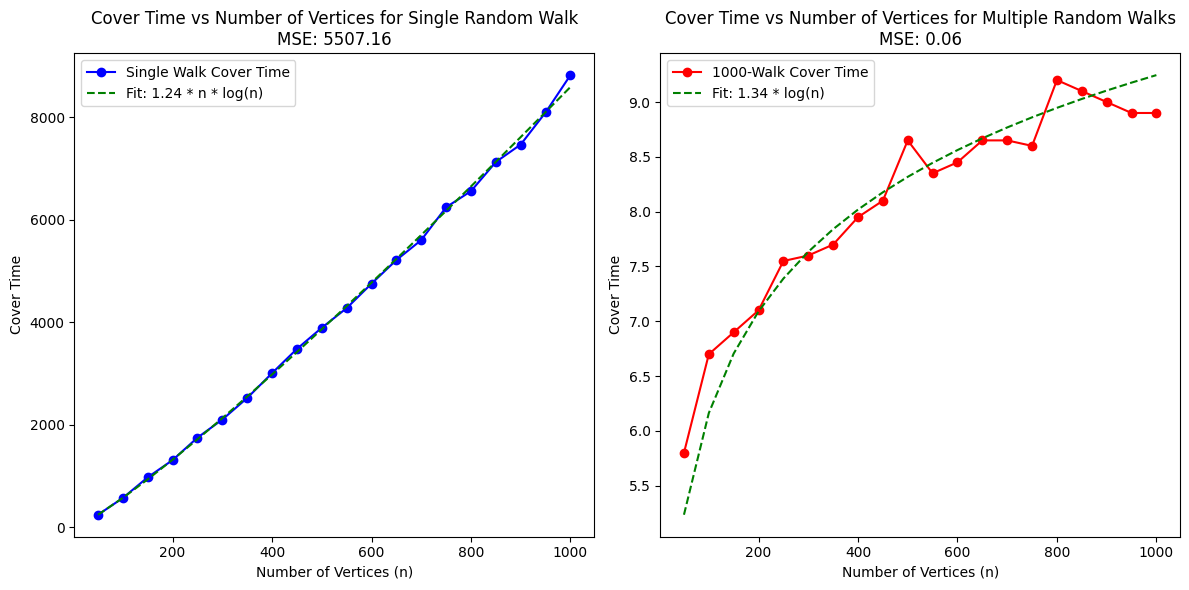

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Compute the cover time for a single random walk starting from start_node
def cover_time_single_walk(graph, start_node, num_simulations):
    cover_times = []
    num_nodes = graph.number_of_nodes()

    for _ in range(num_simulations):
        visited = set()
        current_node = start_node
        steps = 0

        # Simulate the walk until all nodes are visited
        while len(visited) < num_nodes:
            visited.add(current_node)
            neighbors = list(graph.neighbors(current_node))
            current_node = random.choice(neighbors)
            steps += 1

        cover_times.append(steps)

    return np.mean(cover_times)

# Compute the cover time for k parallel random walks starting from start_node
def cover_time_multiple_walks(graph, start_node, num_simulations, num_walks):
    cover_times = []
    num_nodes = graph.number_of_nodes()

    for _ in range(num_simulations):
        visited = set()
        current_nodes = [start_node] * num_walks
        steps = 0

        # Simulate the parallel walks until all nodes are visited
        while len(visited) < num_nodes:
            for i in range(num_walks):
                neighbors = list(graph.neighbors(current_nodes[i]))
                current_nodes[i] = random.choice(neighbors)
                visited.add(current_nodes[i])
            steps += 1

        cover_times.append(steps)

    return np.mean(cover_times)

# Fit function for cover time of a single random walk
def single_walk_fit(n, c):
    return c * n * np.log(n)

# Fit function for cover time of k parallel random walks
def multiple_walk_fit(n, c):
    return c * np.log(n)
#---------------------------------------------------------------------------------------------------------------------------------------------
# Main function
def main():
    num_simulations = 20  # number of simulations
    beta_values = range(1, 21)  # β ∈ {1, 2, ..., 20}
    n_values = [50 * beta for beta in beta_values]  # Values of n: 50, 100, ..., 1000

    single_walk_cover_times = []  # List for cover times of single random walks
    multiple_walk_cover_times = []  # List for cover times of parallel random walks

    # Iterate over different values of n
    for n in n_values:
        complete_graph = nx.complete_graph(n)  # Create a complete graph with n nodes
        cover_times_single = []  # List for cover times of single random walks

        # Compute cover time for a single random walk for each node in the graph
        for start_node in complete_graph.nodes:
            cover_time_single = cover_time_single_walk(complete_graph, start_node, num_simulations)
            cover_times_single.append(cover_time_single)

        # Find the maximum cover time among all nodes for the single random walk
        max_cover_time_single = max(cover_times_single)
        single_walk_cover_times.append(max_cover_time_single)

        k = n  # Number of parallel walks (equal to the number of nodes)
        cover_times_multiple = []  # List for cover times of parallel random walks

        # Compute cover time for k parallel random walks for each node in the graph
        for start_node in complete_graph.nodes:
            cover_time_multi = cover_time_multiple_walks(complete_graph, start_node, num_simulations, k)
            cover_times_multiple.append(cover_time_multi)

        # Find the maximum cover time among all nodes for the parallel walks
        max_cover_time_multiple = max(cover_times_multiple)
        multiple_walk_cover_times.append(max_cover_time_multiple)

    # Fit data using curve_fit for single random walk  --> find the optimal c
    popt_single, _ = curve_fit(single_walk_fit, n_values, single_walk_cover_times)
    # Fit data using curve_fit for parallel random walks  --> find the optimal c
    popt_multiple, _ = curve_fit(multiple_walk_fit, n_values, multiple_walk_cover_times)

    # Extract constants c from fits
    c_single = popt_single[0]
    c_multiple = popt_multiple[0]

    # Compute predicted values and MSE for single random walk
    y_fit_single = single_walk_fit(np.array(n_values), c_single)
    mse_single = np.mean((np.array(single_walk_cover_times) - y_fit_single) ** 2)

    # Compute predicted values and MSE for parallel random walks
    y_fit_multiple = multiple_walk_fit(np.array(n_values), c_multiple)
    mse_multiple = np.mean((np.array(multiple_walk_cover_times) - y_fit_multiple) ** 2)

    # Plot results
    plt.figure(figsize=(12, 6))

    # Plot for cover time of single random walk
    plt.subplot(1, 2, 1)
    plt.plot(n_values, single_walk_cover_times, marker='o', linestyle='-', color='b', label='Single Walk Cover Time')
    plt.plot(n_values, y_fit_single, linestyle='--', color='g', label=f'Fit: {c_single:.2f} * n * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for Single Random Walk\nMSE: {mse_single:.2f}')
    plt.legend()

    # Plot for cover time of k parallel random walks
    plt.subplot(1, 2, 2)
    plt.plot(n_values, multiple_walk_cover_times, marker='o', linestyle='-', color='r', label=f'{k}-Walk Cover Time')
    plt.plot(n_values, y_fit_multiple, linestyle='--', color='g', label=f'Fit: {c_multiple:.2f} * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for Multiple Random Walks\nMSE: {mse_multiple:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



Scatter Plot (M=10)

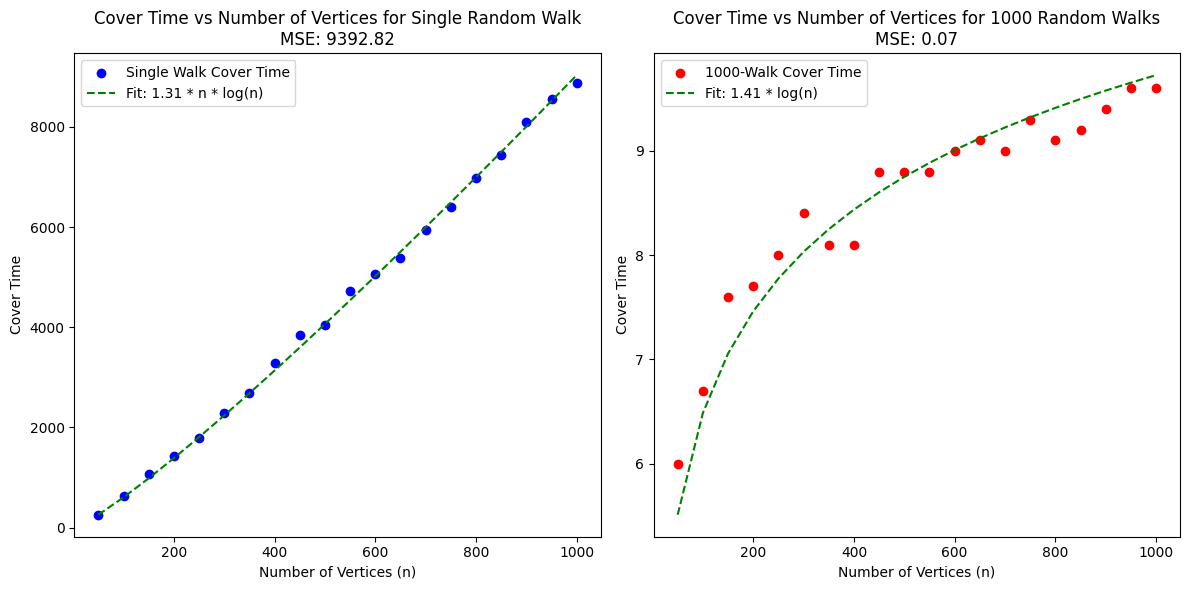

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definizione della funzione di random walk semplice
def random_walk_simple(graph, start_node, num_steps):
    current_node = start_node
    path = [current_node]

    for _ in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        next_node = random.choice(neighbors)
        path.append(next_node)
        current_node = next_node

    return path

# Calcolo del tempo di copertura per una singola passeggiata casuale
def cover_time_single_walk(graph, start_node, num_simulations):
    cover_times = []
    num_nodes = graph.number_of_nodes()

    for _ in range(num_simulations):
        visited = set()
        current_node = start_node
        steps = 0

        while len(visited) < num_nodes:
            visited.add(current_node)
            neighbors = list(graph.neighbors(current_node))
            current_node = random.choice(neighbors)
            steps += 1

        cover_times.append(steps)

    return np.mean(cover_times)

# Calcolo del tempo di copertura per multiple passeggiate casuali parallele
def cover_time_multiple_walks(graph, start_node, num_simulations, num_walks):
    cover_times = []
    num_nodes = graph.number_of_nodes()

    for _ in range(num_simulations):
        visited = set()
        current_nodes = [start_node] * num_walks
        steps = 0

        while len(visited) < num_nodes:
            for i in range(num_walks):
                neighbors = list(graph.neighbors(current_nodes[i]))
                current_nodes[i] = random.choice(neighbors)
                visited.add(current_nodes[i])
            steps += 1

        cover_times.append(steps)

    return np.mean(cover_times)

# Definizione delle funzioni di fitting
def single_walk_fit(n, c):
    return c * n * np.log(n)

def multiple_walk_fit(n, c):
    return c * np.log(n)

# Funzione principale
def main():
    num_simulations = 10  # Numero di simulazioni per ogni valore di n
    beta_values = range(1, 21)  # β ∈ {1, 2, ..., 20}
    n_values = [50 * beta for beta in beta_values]  # Valori di n: 50, 100, ..., 1000

    single_walk_cover_times = []  # Lista per i tempi di copertura della singola passeggiata
    multiple_walk_cover_times = []  # Lista per i tempi di copertura delle passeggiate parallele

    # Itera su diversi valori di n
    for n in n_values:
        complete_graph = nx.complete_graph(n)  # Grafo completo con n nodi

        # Calcola il tempo di copertura per una singola passeggiata casuale per ogni nodo nel grafo
        cover_times_single = []
        for start_node in complete_graph.nodes:
            cover_time_single = cover_time_single_walk(complete_graph, start_node, num_simulations)
            cover_times_single.append(cover_time_single)

        max_cover_time_single = max(cover_times_single)  # Tempo di copertura massimo tra tutti i nodi
        single_walk_cover_times.append(max_cover_time_single)

        # Calcola il tempo di copertura per k passeggiate casuali parallele (k = n) per ogni nodo nel grafo
        k = n
        cover_times_multiple = []
        for start_node in complete_graph.nodes:
            cover_time_multi = cover_time_multiple_walks(complete_graph, start_node, num_simulations, k)
            cover_times_multiple.append(cover_time_multi)

        max_cover_time_multiple = max(cover_times_multiple)  # Tempo di copertura massimo tra tutti i nodi
        multiple_walk_cover_times.append(max_cover_time_multiple)

    # Fit dei dati con curve_fit
    popt_single, _ = curve_fit(single_walk_fit, n_values, single_walk_cover_times)
    popt_multiple, _ = curve_fit(multiple_walk_fit, n_values, multiple_walk_cover_times)

    c_single = popt_single[0]  # Costante c per il fit della singola passeggiata casuale
    c_multiple = popt_multiple[0]  # Costante c per il fit delle passeggiate parallele

    # Calcolo del MSE per i fit
    y_fit_single = single_walk_fit(np.array(n_values), c_single)
    mse_single = np.mean((np.array(single_walk_cover_times) - y_fit_single) ** 2)

    y_fit_multiple = multiple_walk_fit(np.array(n_values), c_multiple)
    mse_multiple = np.mean((np.array(multiple_walk_cover_times) - y_fit_multiple) ** 2)

    # Plot dei risultati
    plt.figure(figsize=(12, 6))

    # Plot per il tempo di copertura della singola passeggiata casuale
    plt.subplot(1, 2, 1)
    plt.scatter(n_values, single_walk_cover_times, color='b', label='Single Walk Cover Time')
    plt.plot(n_values, y_fit_single, linestyle='--', color='g', label=f'Fit: {c_single:.2f} * n * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for Single Random Walk\nMSE: {mse_single:.2f}')
    plt.legend()

    # Plot per il tempo di copertura delle passeggiate parallele
    plt.subplot(1, 2, 2)
    plt.scatter(n_values, multiple_walk_cover_times, color='r', label=f'{k}-Walk Cover Time')
    plt.plot(n_values, y_fit_multiple, linestyle='--', color='g', label=f'Fit: {c_multiple:.2f} * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for {k} Random Walks\nMSE: {mse_multiple:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Scatter Plot (M=20)

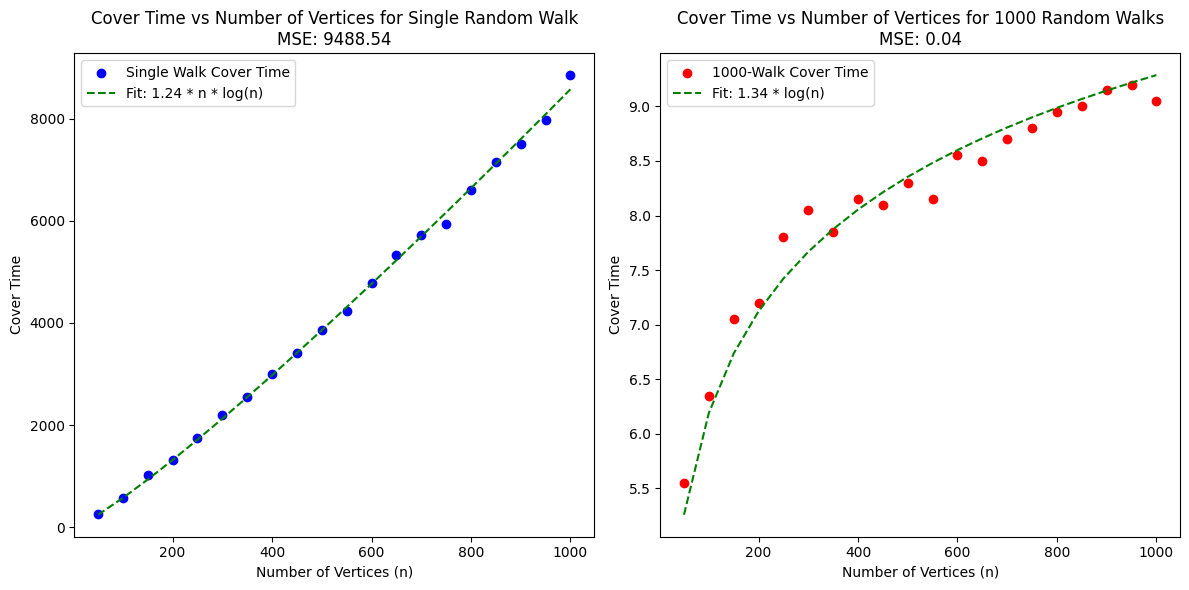

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definizione della funzione di random walk semplice
def random_walk_simple(graph, start_node, num_steps):
    current_node = start_node
    path = [current_node]

    for _ in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        next_node = random.choice(neighbors)
        path.append(next_node)
        current_node = next_node

    return path

# Calcolo del tempo di copertura per una singola passeggiata casuale
def cover_time_single_walk(graph, start_node, num_simulations):
    cover_times = []
    num_nodes = graph.number_of_nodes()

    for _ in range(num_simulations):
        visited = set()
        current_node = start_node
        steps = 0

        while len(visited) < num_nodes:
            visited.add(current_node)
            neighbors = list(graph.neighbors(current_node))
            current_node = random.choice(neighbors)
            steps += 1

        cover_times.append(steps)

    return np.mean(cover_times)

# Calcolo del tempo di copertura per multiple passeggiate casuali parallele
def cover_time_multiple_walks(graph, start_node, num_simulations, num_walks):
    cover_times = []
    num_nodes = graph.number_of_nodes()

    for _ in range(num_simulations):
        visited = set()
        current_nodes = [start_node] * num_walks
        steps = 0

        while len(visited) < num_nodes:
            for i in range(num_walks):
                neighbors = list(graph.neighbors(current_nodes[i]))
                current_nodes[i] = random.choice(neighbors)
                visited.add(current_nodes[i])
            steps += 1

        cover_times.append(steps)

    return np.mean(cover_times)

# Definizione delle funzioni di fitting
def single_walk_fit(n, c):
    return c * n * np.log(n)

def multiple_walk_fit(n, c):
    return c * np.log(n)

# Funzione principale
def main():
    num_simulations = 20  # Numero di simulazioni per ogni valore di n
    beta_values = range(1, 21)  # β ∈ {1, 2, ..., 20}
    n_values = [50 * beta for beta in beta_values]  # Valori di n: 50, 100, ..., 1000

    single_walk_cover_times = []  # Lista per i tempi di copertura della singola passeggiata
    multiple_walk_cover_times = []  # Lista per i tempi di copertura delle passeggiate parallele

    # Itera su diversi valori di n
    for n in n_values:
        complete_graph = nx.complete_graph(n)  # Grafo completo con n nodi

        # Calcola il tempo di copertura per una singola passeggiata casuale per ogni nodo nel grafo
        cover_times_single = []
        for start_node in complete_graph.nodes:
            cover_time_single = cover_time_single_walk(complete_graph, start_node, num_simulations)
            cover_times_single.append(cover_time_single)

        max_cover_time_single = max(cover_times_single)  # Tempo di copertura massimo tra tutti i nodi
        single_walk_cover_times.append(max_cover_time_single)

        # Calcola il tempo di copertura per k passeggiate casuali parallele (k = n) per ogni nodo nel grafo
        k = n
        cover_times_multiple = []
        for start_node in complete_graph.nodes:
            cover_time_multi = cover_time_multiple_walks(complete_graph, start_node, num_simulations, k)
            cover_times_multiple.append(cover_time_multi)

        max_cover_time_multiple = max(cover_times_multiple)  # Tempo di copertura massimo tra tutti i nodi
        multiple_walk_cover_times.append(max_cover_time_multiple)

    # Fit dei dati con curve_fit
    popt_single, _ = curve_fit(single_walk_fit, n_values, single_walk_cover_times)
    popt_multiple, _ = curve_fit(multiple_walk_fit, n_values, multiple_walk_cover_times)

    c_single = popt_single[0]  # Costante c per il fit della singola passeggiata casuale
    c_multiple = popt_multiple[0]  # Costante c per il fit delle passeggiate parallele

    # Calcolo del MSE per i fit
    y_fit_single = single_walk_fit(np.array(n_values), c_single)
    mse_single = np.mean((np.array(single_walk_cover_times) - y_fit_single) ** 2)

    y_fit_multiple = multiple_walk_fit(np.array(n_values), c_multiple)
    mse_multiple = np.mean((np.array(multiple_walk_cover_times) - y_fit_multiple) ** 2)

    # Plot dei risultati
    plt.figure(figsize=(12, 6))

    # Plot per il tempo di copertura della singola passeggiata casuale
    plt.subplot(1, 2, 1)
    plt.scatter(n_values, single_walk_cover_times, color='b', label='Single Walk Cover Time')
    plt.plot(n_values, y_fit_single, linestyle='--', color='g', label=f'Fit: {c_single:.2f} * n * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for Single Random Walk\nMSE: {mse_single:.2f}')
    plt.legend()

    # Plot per il tempo di copertura delle passeggiate parallele
    plt.subplot(1, 2, 2)
    plt.scatter(n_values, multiple_walk_cover_times, color='r', label=f'{k}-Walk Cover Time')
    plt.plot(n_values, y_fit_multiple, linestyle='--', color='g', label=f'Fit: {c_multiple:.2f} * log(n)')
    plt.xlabel('Number of Vertices (n)')
    plt.ylabel('Cover Time')
    plt.title(f'Cover Time vs Number of Vertices for {k} Random Walks\nMSE: {mse_multiple:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
